In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, LSTM, Dropout, Concatenate, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time
seed_value= 644

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
# Upload the train file from your local drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


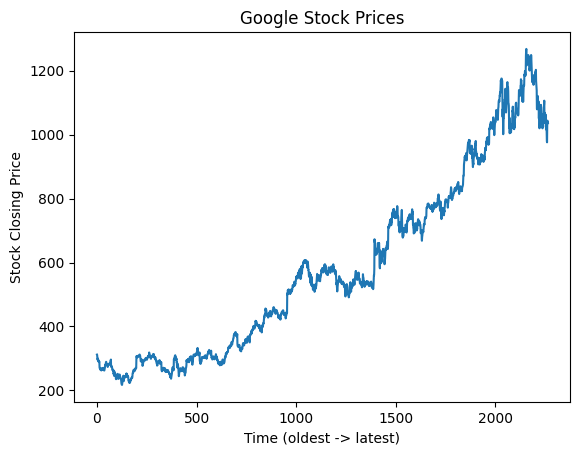

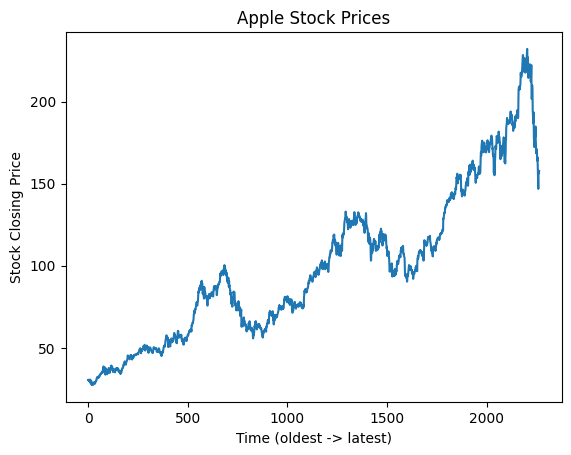

In [ ]:
df_google = pd.read_csv("GOOG.csv",sep="\t")
df_apple = pd.read_csv("AAPL.csv",sep="\t")
plt.plot(df_google['Close'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Closing Price")
plt.show()

plt.plot(df_apple['Close'])
plt.title("Apple Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Closing Price")
plt.show()

In [ ]:
goog = df_google[['High', 'Low', 'Open', 'Volume','Close','Adj Close']].to_numpy()
aapl = df_apple[['High', 'Low', 'Open', 'Volume','Close','Adj Close']].to_numpy()
from sklearn import preprocessing

# MinMax
scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))
traaain = np.concatenate((goog,aapl),axis=1)
goog = scaler.fit_transform(goog)
aapl = scaler.fit_transform(aapl)
traaain = scaler.fit_transform(traaain)


In [ ]:
def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
    data_list1 = np.array(data_list1)
    # np.random.shuffle(data_list1)
    return data_list1

In [ ]:
period = 30
data_list_goog = data_for_training(goog, period)
data_list_aapl = data_for_training(aapl, period)
data_train = data_for_training(traaain,30)

target_list_goog = np.zeros((len(data_list_goog), 1))
for i in range(len(data_list_goog)):
    value = data_list_goog[i][29][4]
    target_list_goog[i][0] = value

target_list_aapl = np.zeros((len(data_list_aapl), 1))
for i in range(len(data_list_aapl)):
    value = data_list_aapl[i][29][4]
    target_list_aapl[i][0] = value

target_train = np.zeros((len(data_list_aapl), 2))
for i in range(len(data_list_aapl)):
    value1 = data_train[i][29][4]
    value2 = data_train[i][29][10]
    target_train[i][0] = value1
    target_train[i][1] = value2

print(data_list_goog.shape)
print(data_list_aapl.shape)
data_train = data_for_training(traaain,30)

(2235, 30, 6)
(2235, 30, 6)


# LSTM Model

In [ ]:
data_dim = 5
timesteps = 30
nb_classes = 2
model = Sequential()
model.add(LSTM(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(LSTM(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 52,866
Trainable params: 52,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_test_size = 0.1
ratio_train = int((1 - my_test_size) * len(data_list_goog))
X_train = data_train[:ratio_train]
y_train = target_train[:ratio_train]
X_test = data_train[ratio_train:]
y_test = target_train[ratio_train:]


In [ ]:
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")


32/32 [==============================] - 2s 51ms/step - loss: 8.3027e-05 - mae: 0.0067
Epoch 40/100
32/32 [==============================] - 2s 52ms/step - loss: 7.8395e-05 - mae: 0.0066
Epoch 41/100
32/32 [==============================] - 2s 78ms/step - loss: 7.7500e-05 - mae: 0.0065
Epoch 42/100
32/32 [==============================] - 2s 61ms/step - loss: 7.8660e-05 - mae: 0.0066
Epoch 43/100
32/32 [==============================] - 2s 51ms/step - loss: 1.0444e-04 - mae: 0.0076
Epoch 44/100
32/32 [==============================] - 2s 50ms/step - loss: 7.6189e-05 - mae: 0.0065
Epoch 45/100
32/32 [==============================] - 2s 52ms/step - loss: 7.6825e-05 - mae: 0.0065
Epoch 46/100
32/32 [==============================] - 2s 51ms/step - loss: 7.5023e-05 - mae: 0.0065
Epoch 47/100
32/32 [==============================] - 2s 50ms/step - loss: 6.8254e-05 - mae: 0.0062
Epoch 48/100
32/32 [==============================] - 2s 66ms/step - loss: 7.4820e-05 - mae: 0.0064
Epoch 49/100


7/7 [==============================] - 0s 31ms/step - loss: 6.8619e-05 - mae: 0.0063
train loss: 1.3857061276212335e-05, train mae: 0.002759003546088934
test loss: 6.86188432155177e-05, test mae: 0.006343305576592684


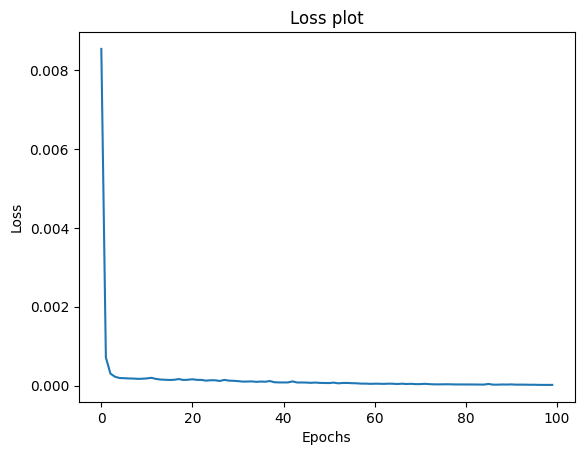

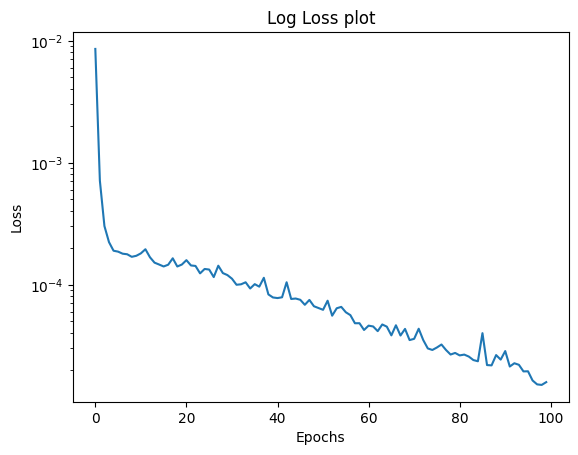

In [ ]:
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
def inv_transform(scaler,data):
    ttest = np.zeros((len(data),12))
    ttest[:,10]=data[:,1]
    ttest[:,4]=data[:,0]
    return scaler.inverse_transform(ttest)
zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)


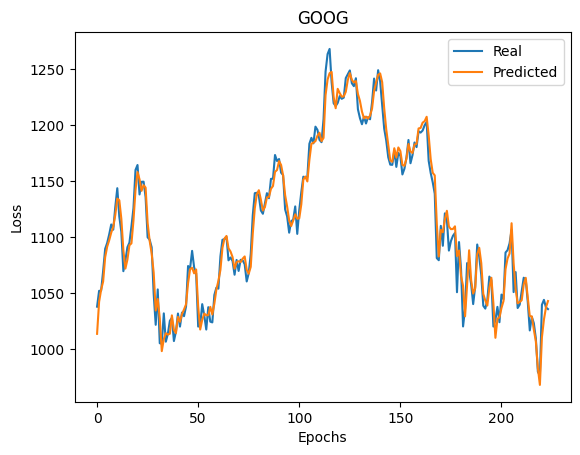

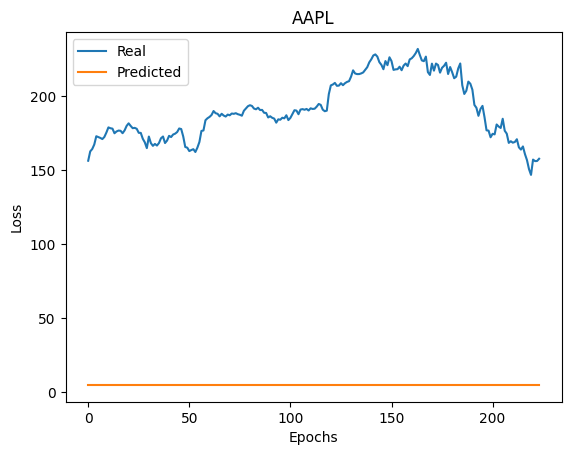

In [ ]:
plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# RNN Model


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 30, 64)            4928      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 13,314
Trainable params: 13,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 4s 34ms/step - loss: 0.0180 - mae: 0.0943
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0011 - mae: 0.0240
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 4.6474e-04 - mae: 0.0156
Epoch 4/100
32/32 [======

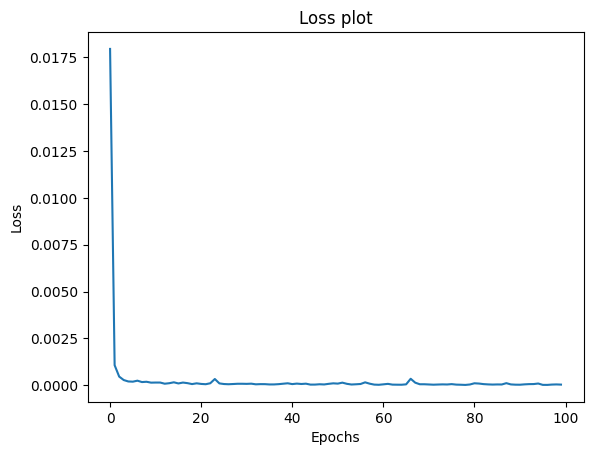

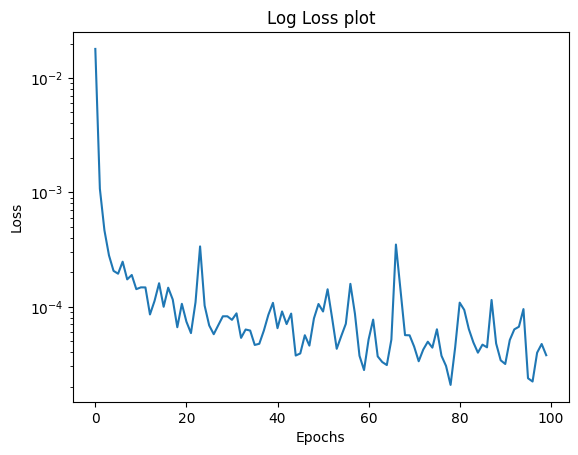

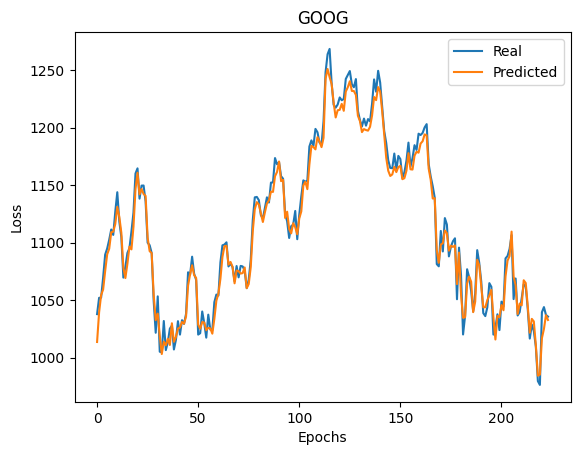

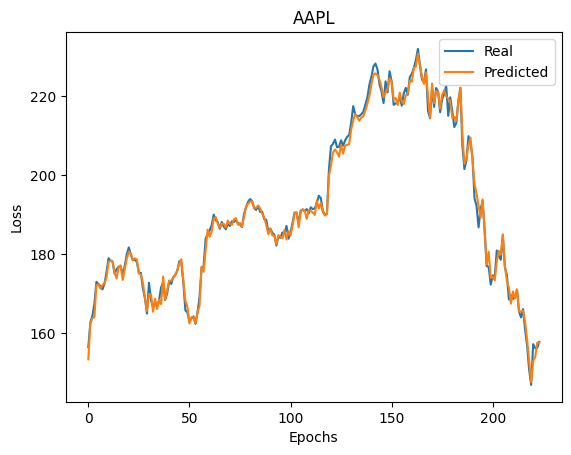

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(SimpleRNN(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()